# Resampling: Bootstrap
#### sampling with replacement


In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import scipy.stats as stats
import pylab as pl

np.random.seed(13)

### What's Resampling?

In [2]:
dat = np.random.choice(4, 12)
Counter(dat)

Counter({0: 4, 1: 1, 2: 6, 3: 1})

In [3]:
w_rep = np.random.choice(dat, 12, replace=True)
Counter(w_rep)

Counter({0: 2, 2: 9, 3: 1})

In [4]:
wo_rep = np.random.choice(dat.ravel(), 12, replace=False)
Counter(wo_rep)

Counter({0: 4, 1: 1, 2: 6, 3: 1})

### What's bootstrapping?
It's a statistical technique for determining accuracy of sample estimates. It's commonly used to estimate the distribution of a population based on a sample.

https://www.stat.auckland.ac.nz/~wild/BootAnim/movies/bootstrap1.mp4

https://www.stat.auckland.ac.nz/~wild/BootAnim/movies/bootstrap1-2.mp4

### Why does it work?
- If don't have enough data to make inferences about *population* (or a way to collect more data), but we still want to answer a question, we use resampling to ask the question many times, in order to see how consistent are the answers that we get based on available data.
- It means that we use a *sample* to answer the question based on resampled data. When we use bootstrap resampling, the *population* is in fact the sample, and is known. 
- Hence the quality of inference of the 'true' sample from resampled data can be measured.

### Is there an easier way to understand bootstrapping?
Let's say you work in a chocolate factory (great success). Your boss asks you to guarantee that all candy bars have a particular mean weight. Since you aren't very keen on weighing every candy bar that the factory produces, you want to use sampling techniques to randomly choose 100 candy bars. You calculate the mean weight of these 100 candy bars, and say that the population mean falls within a margin of error from the mean of your sample.

Suppose that a few months later we want to know with greater accuracy (less of a margin of error) - what the mean candy bar weight was on the day that we sampled the production line. We cannot use today’s candy bars, as too many variables have entered the picture (different batches of milk, sugar and cocoa beans, different atmospheric conditions, different employees on the line, etc.). All that we have from the day that we are curious about are the 100 weights. Without a time machine back to that day, it would seem that the initial margin of error is the best that we can hope for.

Fortunately we can use the technique of bootstrapping. In this situation we randomly sample with replacement  from the 100 known weights. We then call this a bootstrap sample. Since we allow for replacement, this bootstrap sample most likely not identical to our initial sample. Some data points may be duplicated, and others data points from the initial 100 may be omitted in a bootstrap sample. With the help of a computer, thousands of bootstrap samples can be constructed in a relatively short time.

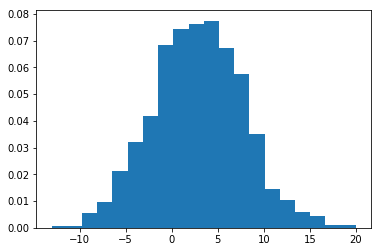

In [5]:
ex1_dat = np.random.normal(loc=3, scale=5, size=1000)
ex1_dat.sort()
pl.hist(ex1_dat, bins=20, normed=True)
pl.show()

In [6]:
def bootstrap_resample(arr, n): 
    return np.random.choice(arr, n)

sample = bootstrap_resample(ex1_dat, 100)
print('Original mean: {}'.format(np.mean(ex1_dat)))
print('Sample mean: {}'.format(np.mean(sample)))

Original mean: 2.84761286917314
Sample mean: 2.602533263547629


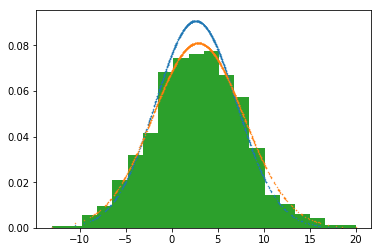

In [7]:
fit_sam = stats.norm.pdf(ex1_dat, np.mean(sample), np.std(sample))
fit = stats.norm.pdf(ex1_dat, np.mean(ex1_dat), np.std(ex1_dat))
pl.plot(ex1_dat, fit_sam, 'o', markersize=0.4)
pl.plot(ex1_dat, fit, 'o', markersize=0.4)
pl.hist(ex1_dat, bins=20, normed=True)
pl.show()

Notes for advanced students:

- More samples != more information

- If population lacks a finite variance (ex. power law distribution), then bootstrap doesn't converge to the same limit as the sample mean